In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # é um módulo dentro do SciPy que fornece diversas funções estatísticas e distribuições de probabilidade
from scipy.stats import norm # é uma das distribuições de probabilidade disponíveis nesse módulo e representa a distribuição normal

## **Exemplo 1**
### **Teste T**

Suponha que uma empresa de comércio eletrônico esteja interessada em saber se uma nova página de destino (landing page) leva a uma taxa de conversão significativamente maior do que a página antiga. A taxa de conversão é a proporção de visitantes que realizam uma determinada ação desejada, como fazer uma compr temos as taxas capturadas ao longo de um período.

1. Hipótese Nula (H0): A taxa de conversão da nova página de destino é igual ou menor do que a da página antiga.
2. Hipótese Alternativa (H1): A taxa de conversão da nova página de destino é maior do que a da página antiga.

In [ ]:
# Taxas de conversão observadas para a nova e antiga LP
taxa_conversao_nova = np.array([0.08, 0.09, 0.07, 0.1, 0.11, 0.09, 0.08, 0.1, 0.12, 0.1,
                                0.09, 0.08, 0.09, 0.11, 0.1, 0.08, 0.09, 0.08, 0.1, 0.11, 0.07,0.07,0.07,0.08])
taxa_conversao_antiga = np.array([0.07, 0.09, 0.08, 0.09, 0.10, 0.07, 0.08, 0.09, 0.08, 0.07,
                                  0.09, 0.08, 0.10, 0.09, 0.07, 0.09, 0.06, 0.09, 0.07, 0.06, 0.06,0.06,0.06,0.07])

In [ ]:
# Realizando o teste de hipótese
t_statistic, p_valor = stats.ttest_ind(taxa_conversao_nova, taxa_conversao_antiga)
# t_statistic, p_valor: Essa linha atribui os resultados do teste t a duas variáveis.
# stats.ttest_ind: Esta é uma função do módulo scipy.stats que realiza um teste t de Student.

# Imprimindo os resultados da variável criada t_statistic e o p_valor do teste
print("Estatística de teste (t-statistic):", t_statistic)
print("p-valor:", p_valor)

# Comparando o p-valor com um nível de significância comum (0.05) criando uma regra para trazer a resposta ideal.
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: a nova página de destino tem uma taxa de conversão significativamente maior.")
else:
    print("Não temos evidências suficientes para rejeitar a hipótese nula: a nova página de destino não tem uma taxa de conversão significativamente maior.")


Estatística de teste (t-statistic): 3.0270374865616985
p-valor: 0.004037307660241849
Rejeitamos a hipótese nula: a nova página de destino tem uma taxa de conversão significativamente maior.


**Abaixo faremos um gráfico que compara a curva da densidade da amostra do site antigo e do site novo:**

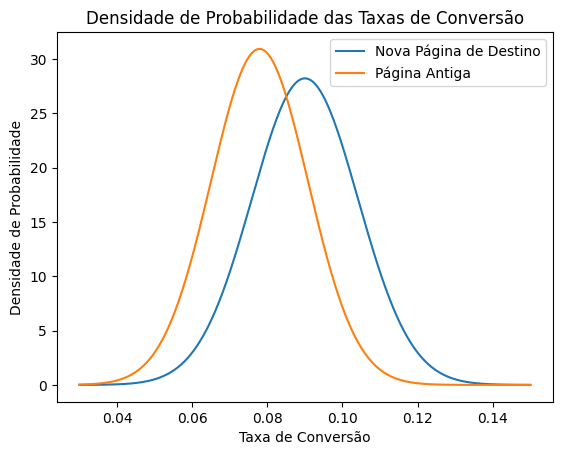

In [ ]:
# Calculando média e desvio padrão das taxas de conversão
media_nova = np.mean(taxa_conversao_nova)  #usando a biblioteca np
desvio_padrao_nova = np.std(taxa_conversao_nova)
media_antiga = np.mean(taxa_conversao_antiga)
desvio_padrao_antiga = np.std(taxa_conversao_antiga)

# Abaixo criamos um intervalo de valores para plotagem
x = np.linspace(0.03, 0.15, 1000)

# Plotando a densidade de probabilidade das taxas de conversão
plt.plot(x, norm.pdf(x, media_nova, desvio_padrao_nova), label='Nova Página de Destino')
plt.plot(x, norm.pdf(x, media_antiga, desvio_padrao_antiga), label='Página Antiga')
plt.xlabel('Taxa de Conversão')
plt.ylabel('Densidade de Probabilidade')
plt.title('Densidade de Probabilidade das Taxas de Conversão')
plt.legend()
plt.show()

Notamos que na LP antiga a maior probabilidade de valores se encontrava entre 6% e 8% enquanto que na LP nova a maior concentração está entre 8% e 10%.

**Agora iremos reproduzir o gráfico do nosso teste t visualizando a área crítica.**

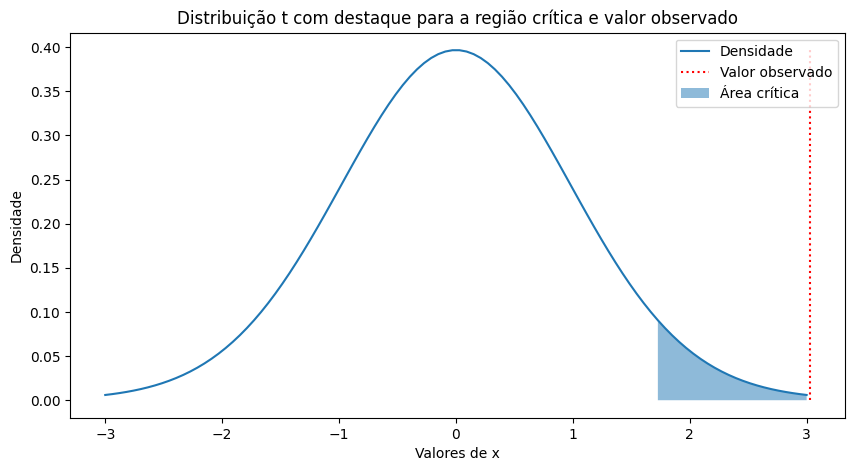

In [ ]:
# Configurações padrão do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Parâmetros da densidade sob H0
mu = 0 # É a média da distribuição t sob a hipótese nula, no caso da distribuição t, a média é sempre 0.
variance = 1  # É a variância da distribuição t sob a hipótese nula, para a distribuição t, a variância é sempre 1.
sigma = variance**.5  #É o desvio padrão da distribuição t sob a hipótese nula. Como a variância é 1, o desvio padrão é a raiz quadrada da variância, ou seja, 1.

# Valores de X e Y para plotar a densidade do nosso gráfico
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.t.pdf(x, len(taxa_conversao_nova) + len(taxa_conversao_antiga) - 2)

# Essas linhas de código estão calculando os limites da região crítica do teste t
low = stats.t.ppf(.95, len(taxa_conversao_nova) + len(taxa_conversao_antiga) - 2)
#len(taxa_conversao_antiga) - 2): Isso calcula o percentil 95 da distribuição t.
#
high = np.inf

# Gráfico da densidade
ax.plot(x, y, label='Densidade')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[t_statistic], ymin=0, ymax=y.max(), colors='r', linestyles='dotted', label='Valor observado')

# Preenchendo a área crítica
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, label='Área crítica')

#Plotagem padrão do gráfico
plt.legend()
plt.xlabel('Valores de x')
plt.ylabel('Densidade')
plt.title('Distribuição t com destaque para a região crítica e valor observado')
plt.show()

Observamos que o valor observado do p-value está bem no finalzinho da nossa área crítica, sua área é bem pequena se comparada a área total crítica.

## **Exemplo 2:**
### **Teste Z**

Suponha que uma empresa esteja interessada em saber se a eficácia de um novo medicamento é significativamente diferente da eficácia do medicamento existente no tratamento de uma determinada condição médica.

* O medicamento existente tem uma taxa média de sucesso de 75% no tratamento da condição.
* O novo medicamento está sendo testado e a empresa espera que ele tenha uma taxa média de sucesso maior.


Para realizar esse teste, a empresa recruta dois grupos de pacientes:



1.   Grupo 1 (Medicamento Existente): 50 pacientes que recebem o medicamento existente.
2.   Grupo 2 (Novo Medicamento): 50 pacientes que recebem o novo medicamento.


Após o tratamento, a empresa registra quantos pacientes de cada grupo tiveram sucesso no tratamento da condição.


In [ ]:
# Tamanho das amostras
n = 50

# Taxa média de sucesso do medicamento existente e do novo medicamento
taxa_existente_media = 0.75
taxa_novo_media = 0.85  # Vamos supor que o novo medicamento tenha uma taxa 10% maior de sucesso

# Gerando os dados das duas amostras
np.random.seed(0)  # Para garantir a reprodutibilidade
grupo_existente = np.random.binomial(n=1, p=taxa_existente_media, size=n)
grupo_novo = np.random.binomial(n=1, p=taxa_novo_media, size=n)

print("Grupo do medicamento existente:", grupo_existente)
print("Grupo do novo medicamento:", grupo_novo)


Grupo do medicamento existente: [1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1]
Grupo do novo medicamento: [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1]


* Hipótese Nula (H0): A hipótese nula afirma que não há diferença
significativa entre as taxas de sucesso dos dois medicamentos.
* Hipótese Alternativa (H1): A hipótese alternativa nega a hipótese nula e afirma que há uma diferença significativa entre as taxas de sucesso dos dois medicamentos.

Se é diferente então é BILATERAL.

1 indica sucesso no tratamento.
0 indica fracasso no tratamento.

In [ ]:
# Calcular as médias amostrais
media_existente = grupo_existente.mean()
media_novo = grupo_novo.mean()
print(media_existente, media_novo)

0.74 0.92


In [ ]:
# Calcular as variâncias amostrais
var_existente = grupo_existente.var(ddof=1)
var_novo = grupo_novo.var(ddof=1)
print(var_existente, var_novo)

0.19632653061224492 0.07510204081632653


In [ ]:
# Tamanho das amostras
n = len(grupo_existente)

# Calcular a estatística de teste Z com a formula:
z_statistic = (media_novo - media_existente) / ((var_existente/n + var_novo/n)**0.5)
#Nessa linha nós escrevemos a formula do Z vista em aula

# Calcular o p-valor (teste bilateral)
p_valor = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
# stats.norm.cdf(abs(z_statistic)): Esta parte calcula a área sob a curva normal padrão até o valor absoluto da estatística de teste Z
# 2 * ...: Multiplicamos o resultado em (2) por 2 porque é um teste bilateral.


# Imprimir os resultados
print("Estatística de teste Z:", z_statistic)
print("p-valor:", p_valor)

# Comparar o p-valor com o nível de significância
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as taxas de sucesso dos dois medicamentos.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que há uma diferença significativa entre as taxas de sucesso dos dois medicamentos.")

Estatística de teste Z: 2.4430352131378665
p-valor: 0.014564316140217137
Rejeitamos a hipótese nula: há uma diferença significativa entre as taxas de sucesso dos dois medicamentos.


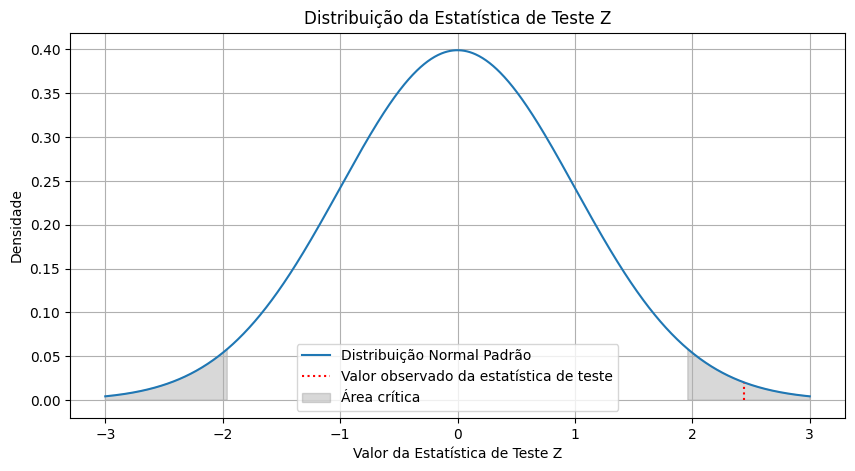

In [ ]:
# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Valores de X e Y para plotar a distribuição
x = np.linspace(-3, 3, 1000)
# x = np.linspace(-3, 3, 1000): Esta linha cria um array x de 1000 pontos igualmente espaçados no intervalo de -3 a 3. Esse intervalo foi escolhido para abranger uma ampla gama de valores típicos para a estatística de teste Z, que segue uma distribuição normal padrão
y = stats.norm.pdf(x, 0, 1)
# y = stats.norm.pdf(x, 0, 1): Esta linha calcula os valores de densidade de probabilidade para cada ponto no array x com base na distribuição normal padrão.

# Plotando a distribuição normal padrão
ax.plot(x, y, label='Distribuição Normal Padrão')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[z_statistic], ymin=0, ymax=stats.norm.pdf(z_statistic, 0, 1),
          colors='r', linestyles='dotted', label='Valor observado da estatística de teste')

# Área crítica
critical_region = stats.norm.ppf(0.025), stats.norm.ppf(0.975)
ax.fill_between(x, y, where=(x < critical_region[0]) | (x > critical_region[1]), color='gray', alpha=0.3, label='Área crítica')

# Legenda e rótulos
plt.legend()
plt.xlabel('Valor da Estatística de Teste Z')
plt.ylabel('Densidade')
plt.title('Distribuição da Estatística de Teste Z')
plt.grid(True)

# Exibindo o gráfico
plt.show()

Vejam que por ser bilateral temos duas áreas críticas sinalizadas, nosso p value precisa estar dentro de uma delas para rejeitarmos a hipótese nula, como encontramos.